In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('churn.csv')
df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,NaN,No,1.0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Cleaning

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')
df = df.dropna()
df['SeniorCitizen'] = df['SeniorCitizen'].astype('int')
df.head()


,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34.0,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2.0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8.0,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6911 entries, 1 to 7045
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6911 non-null   object 
 1   Gender            6911 non-null   object 
 2   SeniorCitizen     6911 non-null   int64  
 3   Partner           6911 non-null   object 
 4   Dependents        6911 non-null   object 
 5   Tenure            6911 non-null   float64
 6   Contract          6911 non-null   object 
 7   PaperlessBilling  6911 non-null   object 
 8   PaymentMethod     6911 non-null   object 
 9   MonthlyCharges    6911 non-null   float64
 10  TotalCharges      6911 non-null   float64
 11  Churn             6911 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 701.9+ KB


In [ ]:
df.isnull().sum()

customerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Multicolinearity Study

<ipython-input-11-d52969cb0c51>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


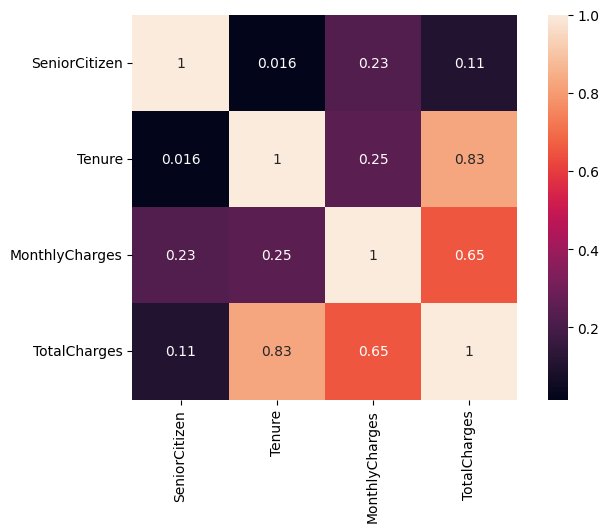

In [ ]:
correlation = df.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation, square=True,annot=True);

#For tree-based algorithm multicollinearity would not impact the prediction performance

## Categorical Data Handling

In [ ]:
df['Churn'] = df['Churn'].replace("No", 0).replace("Yes", 1)
df['Partner'] = df['Partner'].replace("No", 0).replace("Yes", 1)
df['PaperlessBilling'] = df['Partner'].replace("No", 0).replace("Yes", 1)
df['Dependents'] = df['Partner'].replace("No", 0).replace("Yes", 1)
df['Gender'] = df['Gender'].replace("Female", 0).replace("Male", 1)
df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,1,0,0,0,34.0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2.0,Month-to-month,0,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45.0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2.0,Month-to-month,0,Electronic check,70.70,151.65,1
5,9305-CDSKC,0,0,0,0,8.0,Month-to-month,0,Electronic check,99.65,820.50,1


In [ ]:
df = pd.get_dummies(data=df,columns=['Contract','PaymentMethod'],drop_first=True)

In [ ]:
df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1,5575-GNVDE,1,0,0,0,34.0,0,56.95,1889.50,0,1,0,0,0,1
2,3668-QPYBK,1,0,0,0,2.0,0,53.85,108.15,1,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45.0,0,42.30,1840.75,0,1,0,0,0,0
4,9237-HQITU,0,0,0,0,2.0,0,70.70,151.65,1,0,0,0,1,0
5,9305-CDSKC,0,0,0,0,8.0,0,99.65,820.50,1,0,0,0,1,0


All the features is numerical so there isn't need for feature selection for now

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['Churn', 'customerID'], axis=1).to_numpy()
y = df[['Churn']].to_numpy()
y = y.reshape(len(y),)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

# note: we use recall
rf_gridcv = GridSearchCV(rf, parameters, cv=5, scoring='recall',error_score='raise')
rf_gridcv.fit(X_train, y_train)

CPU times: user 11.7 s, sys: 32.9 ms, total: 11.7 s
Wall time: 11.8 s


GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': (1, 2, 3, 4, 5),
                         'n_estimators': (10, 20, 30, 40, 50)},
             scoring='recall')

In [ ]:
# the results
grid_result = pd.DataFrame(rf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
grid_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
21,"{'max_depth': 5, 'n_estimators': 20}",0.404646,1
20,"{'max_depth': 5, 'n_estimators': 10}",0.399879,2
22,"{'max_depth': 5, 'n_estimators': 30}",0.384874,3
23,"{'max_depth': 5, 'n_estimators': 40}",0.376000,4
24,"{'max_depth': 5, 'n_estimators': 50}",0.374660,5
15,"{'max_depth': 4, 'n_estimators': 10}",0.358979,6
16,"{'max_depth': 4, 'n_estimators': 20}",0.347408,7
17,"{'max_depth': 4, 'n_estimators': 30}",0.337176,8
18,"{'max_depth': 4, 'n_estimators': 40}",0.329003,9
19,"{'max_depth': 4, 'n_estimators': 50}",0.321513,10


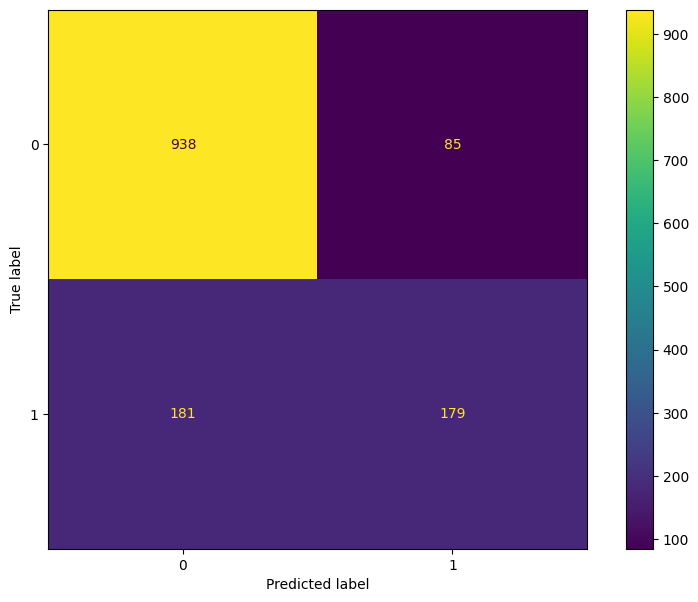

In [ ]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report
from sklearn.metrics import classification_report
y_pred = rf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1023
           1       0.68      0.50      0.57       360

    accuracy                           0.81      1383
   macro avg       0.76      0.71      0.72      1383
weighted avg       0.80      0.81      0.80      1383

